In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

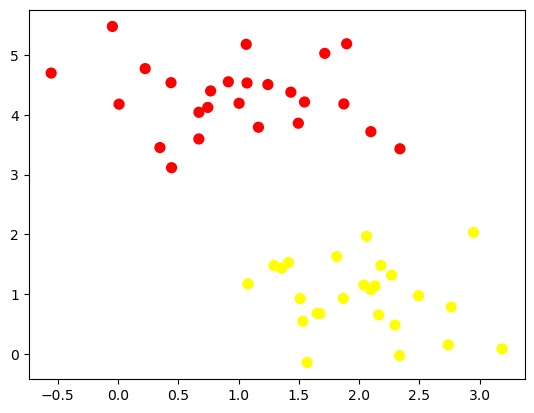

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

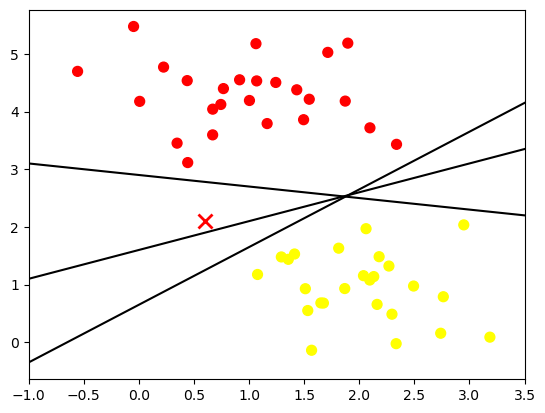

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1.0, 3.5)

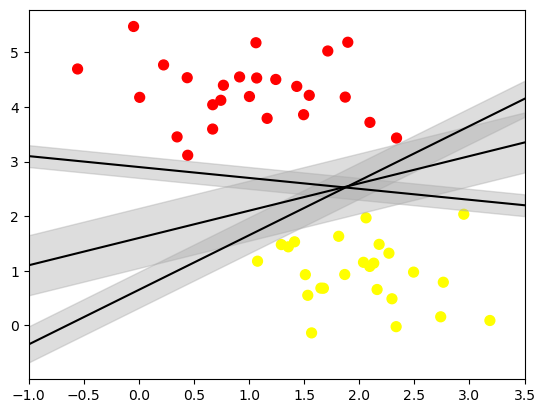

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

#### Penerappan fitting SVM

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [6]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

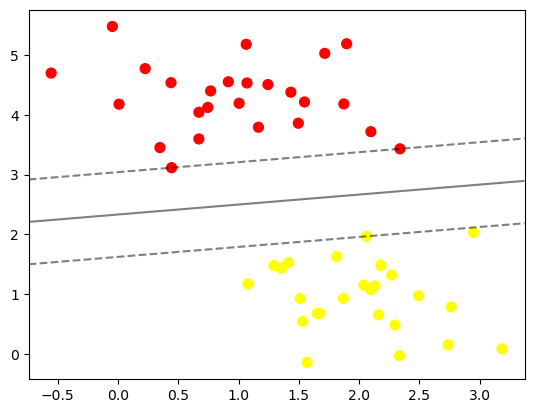

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [24]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.26604148, 2.71915015],
       [1.34880003, 3.07479238],
       [1.88779063, 3.31592667],
       [0.13742771, 3.16777298],
       [2.79207378, 3.14029479],
       [2.48279064, 3.22558008],
       [2.47031647, 3.52196502],
       [1.66781904, 3.71005531],
       [0.32575305, 2.92276125],
       [0.56762597, 3.35928158],
       [3.59362114, 2.08207549],
       [1.46361712, 2.13207534],
       [2.29385806, 1.95877238],
       [1.70714468, 2.37707464],
       [2.00067424, 2.26833784],
       [1.1167688 , 2.45256061],
       [1.65684156, 2.4412893 ],
       [1.36628697, 2.42571562],
       [1.32500974, 1.79127669],
       [1.07491911, 1.57315404]])

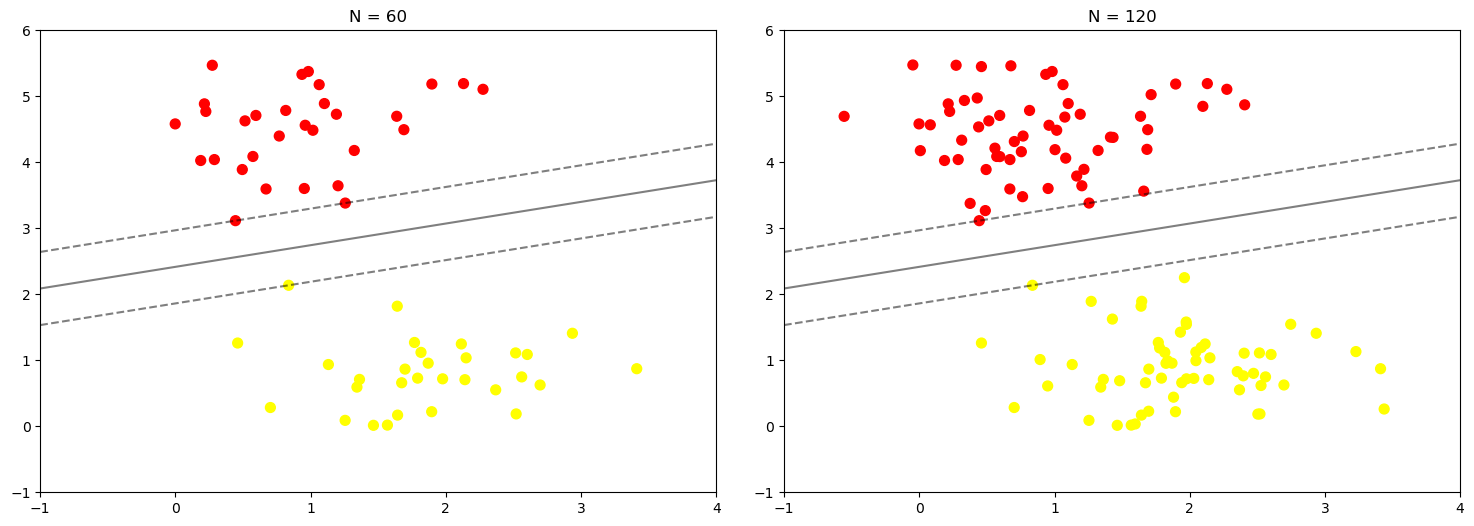

In [25]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

#### Data Tidak Terpisah Secara Linier

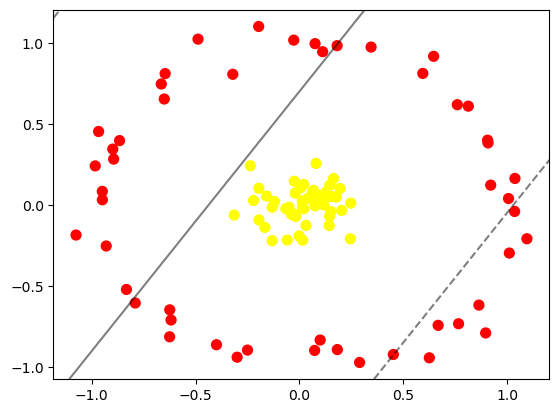

In [26]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [27]:
r = np.exp(-(X ** 2).sum(1))

In [33]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, widgets

# Create some sample data (replace this with your own data)
X = np.random.rand(100, 2)
y = np.random.rand(100)

def plot_3D(elev=30, azim=30, X=X, y=y):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    r = np.sqrt(X[:, 0]**2 + X[:, 1]**2)
    ax.scatter(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    plt.show()

interact(plot_3D, elev=widgets.Dropdown(description='elev', options=[-90, 45, 30, 20, 10], value=30),
         azim=widgets.IntSlider(description='azim', min=-180, max=180, step=1, value=30),
          X=fixed(X), y=fixed(y))
# interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
#          X=fixed(X), y=fixed(y))


interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[0.59442223, 0.69228791],
       [0.09629486, 0.58897889],
       [0.88031453, 0.23684737],
       [0.83111393, 0.73571641],
       [0.64573132, 0.29645763],
       [0.62691337, 0.51128111],
       [0.28041921, 0.1260976 ],
       [0.34353177, 0.19145171],
       [0.64946455, 0.24163299],
       [0.80039253, 0.68188397],
       [0.97470182, 0.67834544],
       [0.35250647, 0.06508973],
       [0.07624878, 0.21038911],
       [0.89923525, 0.0863005 ],
       [0.67624398, 0.81796123],
       [0.11922285, 0.44805089],
       [0.48923971, 0.60604948],
       [0.82328785, 0.16637886],
       [0.26320436, 0.11224229],
       [0.86995732, 0.04015816],
       [0.20634981, 0.57688323],
       [0.26646501, 0.96690472],
       [0.18523182, 0.49486988],
       [0.61960752, 0.40636487],
       [0.36438337, 0.23729771],
       [0.28787255, 0.2749174 ],
       [0.0982658 , 0.72439225],
       [0.63067153, 0.33484994],
       [0.93646463, 0.3915139

In [37]:
from sklearn.svm import SVC
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

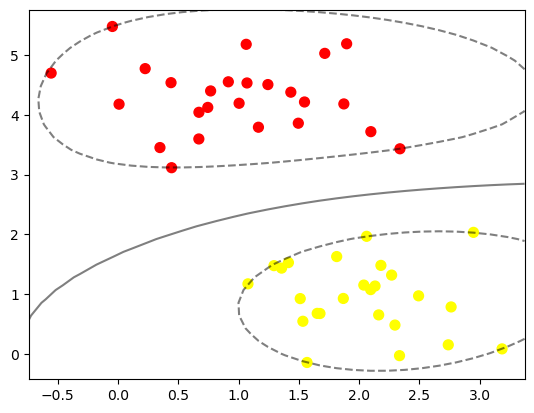

In [36]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

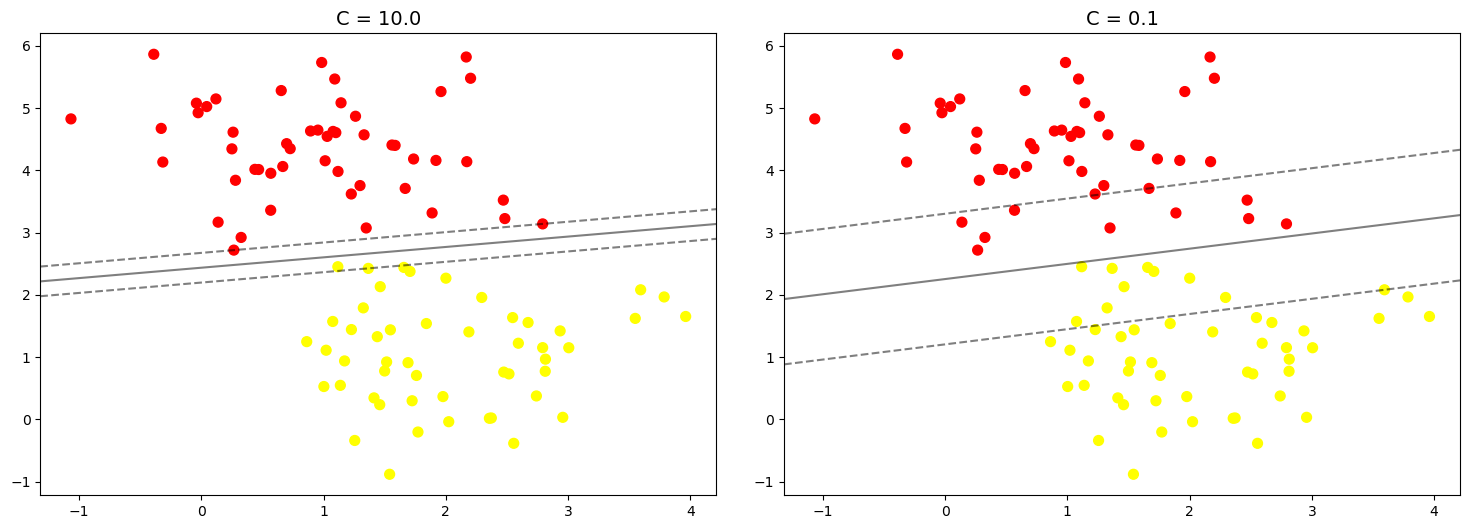

In [23]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)